**Problem statement**

* You want to give readers an better reading experience at Medium. To do that you want to recommend articles to the user on the bases of current article that the user is reading.
* Given Medium article find the similar article.

In [3]:
# Library to display dataframe and image
from IPython.display import display
from PIL import Image

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data manuplation
import pandas as pd
import numpy as np

# inbuild library to work with textual data
import string

# setting up NLTK for pre-processing the data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

sns.set_style('darkgrid')
pd.set_option('display.max_columns', 100)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
articles = pd.read_csv('/content/medium_data.csv')
articles.head()


,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023


In [9]:
print("Shape of articles :", articles.shape)

Shape of articles : (2498, 9)


In [11]:
from pprint import pprint
pprint(articles.iloc[0].to_dict())

{'claps': 453.0,
 'date': '27-01-2023',
 'id': 1,
 'publication': 'Towards Data Science',
 'reading_time': 9,
 'responses': 11,
 'subtitle': 'Part 1: The Risks and Ethical\xa0Issues…',
 'title': 'Not All Rainbows and Sunshine: The Darker Side of\xa0ChatGPT',
 'url': 'https://towardsdatascience.com/not-all-rainbows-and-sunshine-the-darker-side-of-chatgpt-75917472b9c'}


In [12]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2498 non-null   int64  
 1   url           2498 non-null   object 
 2   title         2498 non-null   object 
 3   subtitle      2073 non-null   object 
 4   claps         2423 non-null   float64
 5   responses     2498 non-null   int64  
 6   reading_time  2498 non-null   int64  
 7   publication   2498 non-null   object 
 8   date          2498 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 175.8+ KB


In [14]:
articles.describe(include='all')

,id,url,title,subtitle,claps,responses,reading_time,publication,date
count,2498.000000,2498,2498,2073,2423.000000,2498.000000,2498.000000,2498,2498
unique,NaN,1849,1848,1518,NaN,NaN,NaN,4,70
top,NaN,https://towardsdatascience.com/not-all-rainbow...,Ludic audio and player performance,Weekly curated resources for…,NaN,NaN,NaN,Towards Data Science,04-01-2023
freq,NaN,2,3,7,NaN,NaN,NaN,1228,80
mean,1249.500000,NaN,NaN,NaN,367.353281,5.544035,7.479984,NaN,NaN
std,721.254809,NaN,NaN,NaN,678.886988,12.793039,3.699977,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,625.250000,NaN,NaN,NaN,62.000000,0.000000,5.000000,NaN,NaN
50%,1249.500000,NaN,NaN,NaN,155.000000,2.000000,7.000000,NaN,NaN
75%,1873.750000,NaN,NaN,NaN,381.500000,5.000000,9.000000,NaN,NaN


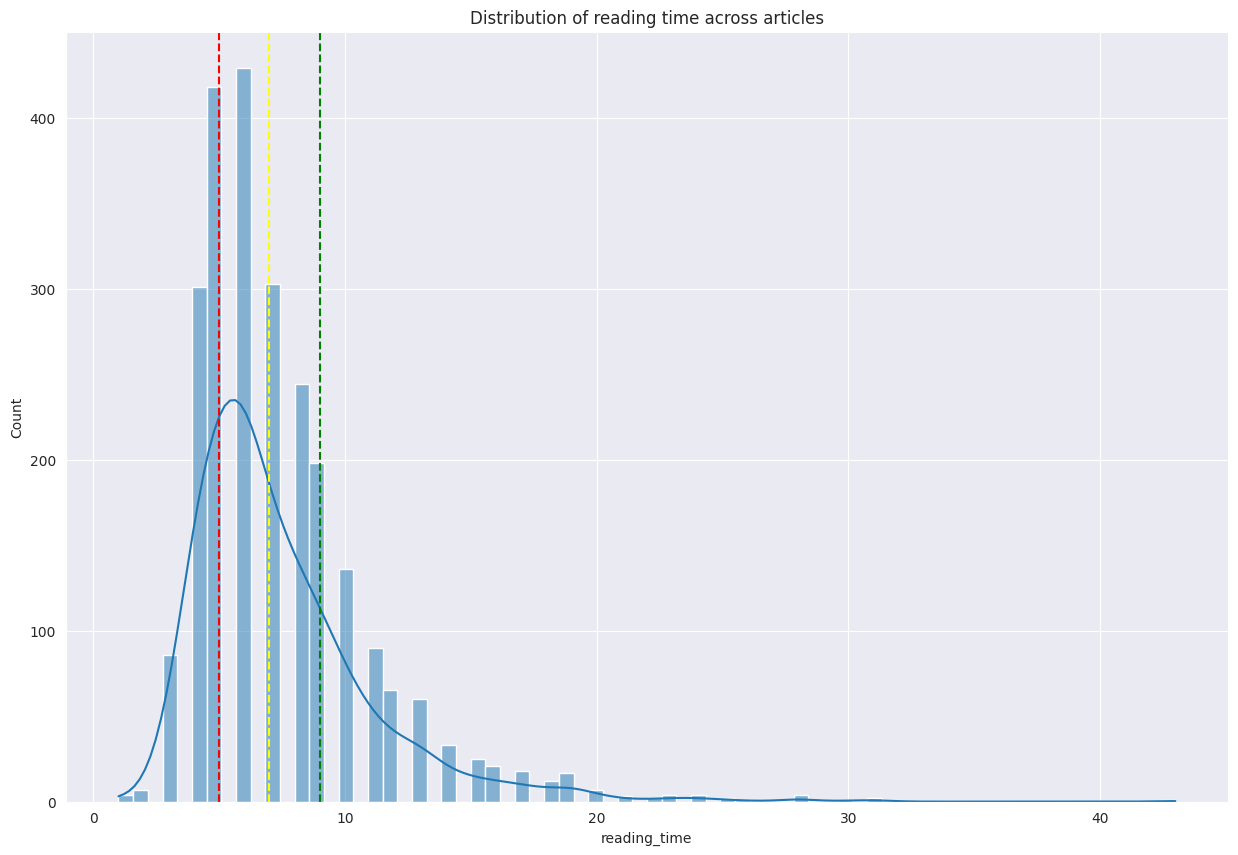

In [18]:
plt.figure(figsize=(15, 10))
# creating Histograms
sns.histplot(data=articles['reading_time'], kde=True)

#percentiles
first_q = np.percentile(articles['reading_time'], 25)
secound_q = np.percentile(articles['reading_time'], 50)
third_q = np.percentile(articles['reading_time'], 75)

# colour line for percentile
plt.axvline(first_q, color='red', linestyle='--')
plt.axvline(secound_q, color='yellow', linestyle='--')
plt.axvline(third_q, color='green', linestyle='--')

plt.title('Distribution of reading time across articles')
plt.show()

In [20]:
articles.isnull().sum()

,0
id,0
url,0
title,0
subtitle,425
claps,75
responses,0
reading_time,0
publication,0
date,0


In [24]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00


In [30]:
import re
import contractions

stemmer = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

def text_preprocessing(text):
  text = text.lower()

  text = contractions.fix(text)

  text = re.sub(r'[^\w\s]','', text)

  tokens = [stemmer.stem(word) for word in text.split() if word not in stopwords_set]

  return ' '.join(tokens)

articles['proceed_title'] = articles['title'].apply(text_preprocessing)

articles.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date,Processed_Text,proceed_title
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023,rainbow sunshin darker side chatgpt,rainbow sunshin darker side chatgpt
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023,ethic ai potenti root caus bias algorithm,ethic ai potenti root caus bias algorithm
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023,python tupl whole truth truth let us dig deep,python tupl whole truth truth let us dig deep
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023,date subqueri sql,date subqueri sql
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023,tempor differ python first samplebas reinforc ...,tempor differ python first samplebas reinforc ...


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'articles' is your DataFrame and 'proceed_title' is the column containing text data
text = articles['proceed_title']

# Initialize the TF-IDF Vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500
)

# Fit the vectorizer on the text data
word_vectorizer.fit(text)

# Transform the text data into TF-IDF features
WordFeatures = word_vectorizer.transform(text)


In [33]:
WordFeatures.shape

(2498, 1500)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming 'WordFeatures' is the TF-IDF matrix obtained previously
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(WordFeatures)

# Define a function to get the top 5 similar documents for a given document index
def get_top_5_similar_documents(doc_index, cosine_sim_matrix):
    # Get the similarity scores for the specified document
    sim_scores = cosine_sim_matrix[doc_index]

    # Sort the scores in descending order and get the indices of the top 5
    top_5_indices = np.argsort(sim_scores)[::-1][1:6]

    return top_5_indices, sim_scores[top_5_indices]

# Example: Get the top 5 similar documents for the first document in the dataset
doc_index = 143  # Change this index to the document of interest
top_5_indices, top_5_scores = get_top_5_similar_documents(doc_index, cosine_sim)

# Display the results
for i, idx in enumerate(top_5_indices):
    print(f"Rank {i+1}: Document Index {idx} with similarity score {top_5_scores[i]:.4f}")
    print(f"Document: {articles['title'].iloc[idx]}\n")


Rank 1: Document Index 1442 with similarity score 0.8564
Document: How to Perform Outlier Detection in Python for Machine Learning: Part 1

Rank 2: Document Index 141 with similarity score 0.4749
Document: How to Detect Drift in Machine Learning Models

Rank 3: Document Index 963 with similarity score 0.3775
Document: Machine Learning for Jiu Jitsu

Rank 4: Document Index 1653 with similarity score 0.3775
Document: Machine Learning for Jiu Jitsu

Rank 5: Document Index 1339 with similarity score 0.3647
Document: Outlier Detection Using Principal Component Analysis and Hotelling’s T2 and SPE/DmodX Methods



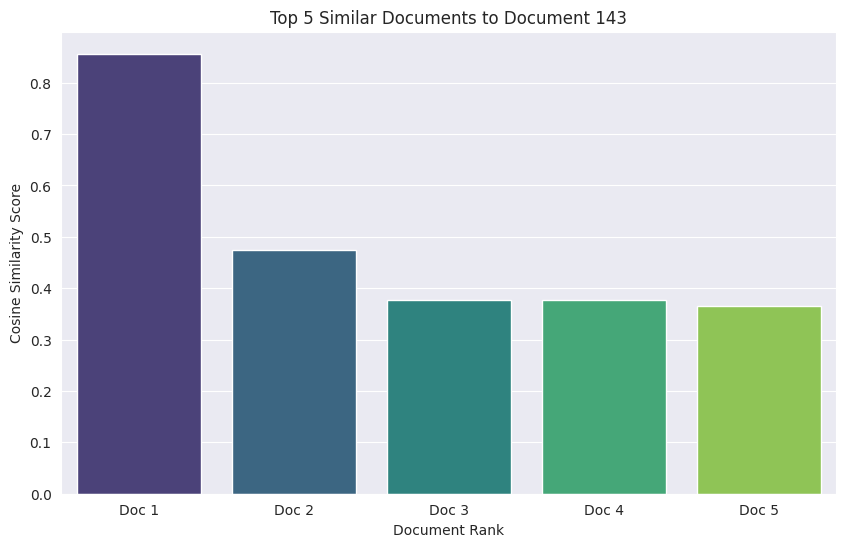

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Plotting the Cosine Similarity Scores of the Top 5 Similar Documents
def plot_top_5_similarities(top_5_indices):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[f'Doc {i+1}' for i in range(5)], y=top_5_scores, palette="viridis")
    plt.title(f"Top 5 Similar Documents to Document {doc_index}")
    plt.ylabel("Cosine Similarity Score")
    plt.xlabel("Document Rank")
    plt.show()

plot_top_5_similarities(top_5_indices)

